## Medical Insurance Cost Prediction

### Health Insurance
Health insurance provides medical coverage to the insured against any emergency and planned medical expenses. It provides financial assistance to cover the cost of hospitalization, surgeries, day care procedures, etc. A health insurance plan offers cashless treatment or reimburses the medical treatment costs of the insured.

### Columns of dataset
* Age: Age of primary beneficiary
* Sex: Primary beneficiary’s gender
* BMI: Body mass index (providing an understanding of the body, weights that are relatively high or low relative to height)
* Children: Number of children covered by health insurance / Number of dependents
* Smoker: Smoking (yes, no)
* Region: Beneficiary’s residential area in the US (northeast, southeast, southwest, northwest)
* Charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Akash\\Downloads\\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory of Data

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.shape

(1338, 7)

* There are 1338 rows and 7 columns.

In [8]:
df.size

9366

* Total size of rows and columns.

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

* There are sex,smoker and region string(Categorical) data type.
* There are age and children integer data type.
* There are bmi and charges float data type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no null values.

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

* There are no duplicate values.

In [14]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [16]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [18]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [19]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

* There are Maximum number of Male people compared to Female people


In [20]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [21]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

* There are maximum number of **No Smokers** people compared to **Yes Smokers** people.

## Visualization of the Data
### Univariate Analysis

In [22]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="green",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)

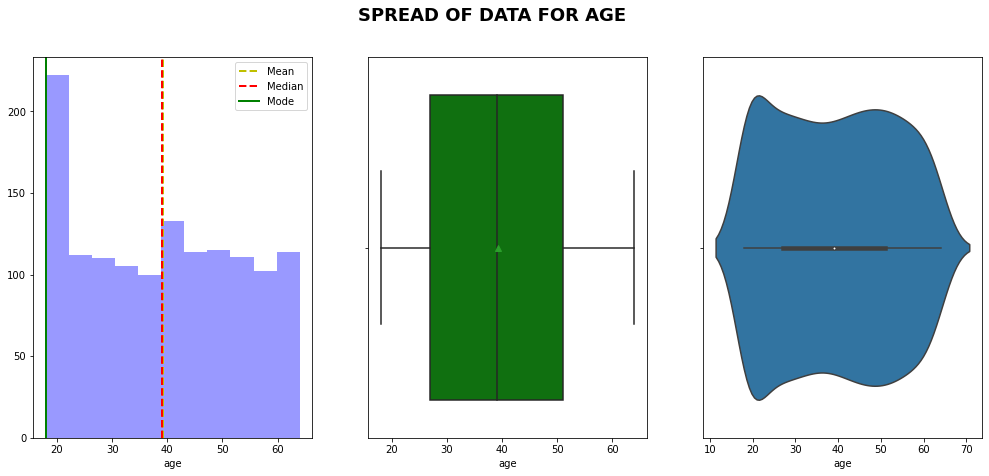

In [23]:
dist_box_violin(df.age)

* There are Right Skewed Data(Positive Skewed Data).
* There are no Outliers.

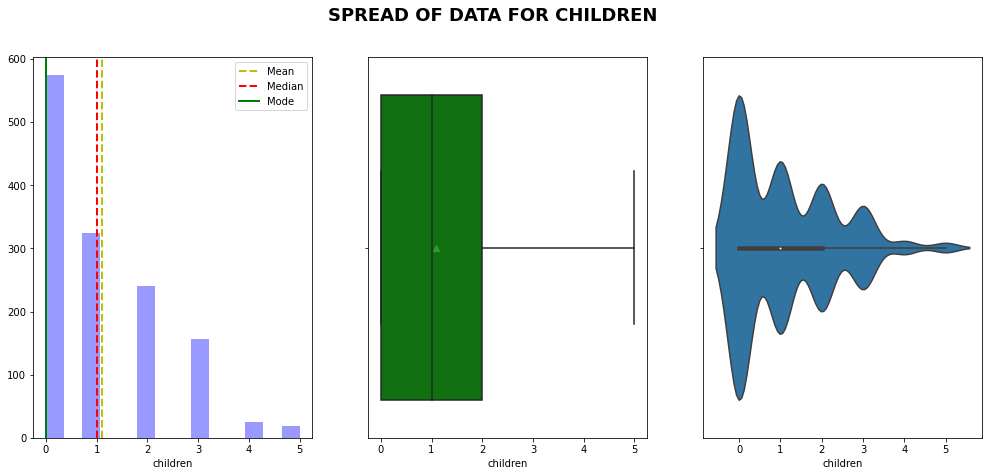

In [24]:
dist_box_violin(df.children)

* There are Right Skewed Data(Positive Skewed Data).
* There are no Outliers.

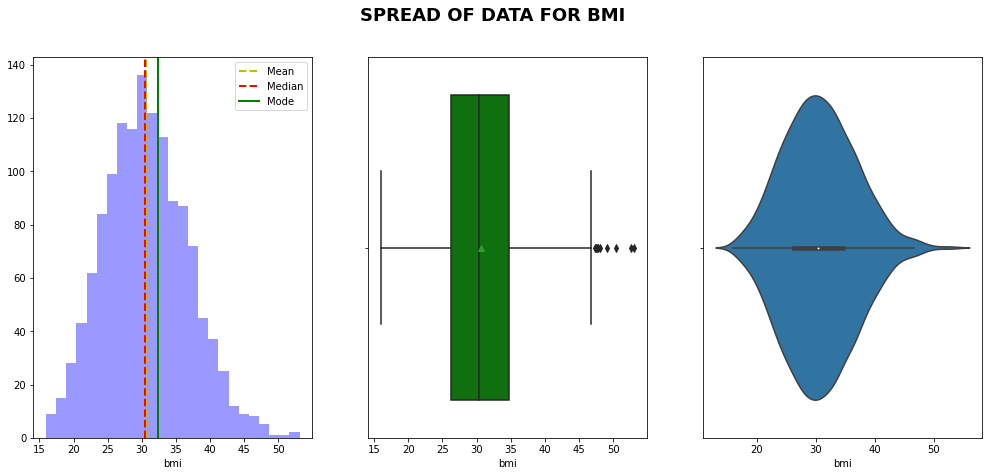

In [25]:
dist_box_violin(df.bmi)

* There are Left Skewed Data(Negative Skewed Data).
* There are Outliers after 45 bmi.

### Pie Chart 

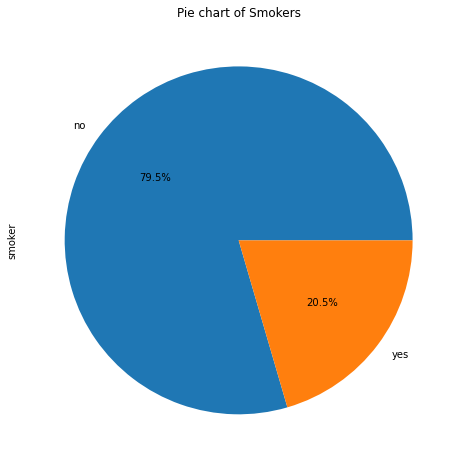

In [27]:
plt.figure(figsize=(14,7))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Smokers")
plt.show()

* There are Maximum Percentage(79.5%) **No Smokers.**
* There are Minimum Percentage(20.5%) **Yes Smokers.**



## Bi Variate Analysis

smoker   no  yes
sex             
female  547  115
male    517  159


Text(0.5, 1.0, 'Sex By Smoker')

<Figure size 1296x1296 with 0 Axes>

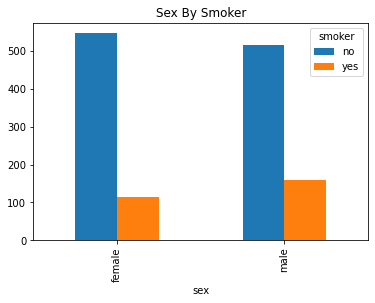

In [28]:
plt.figure(figsize=(18,18))
prd_innings=pd.crosstab(df['sex'],df['smoker'] )
print(prd_innings)

ax=prd_innings.plot(kind='bar')

plt.title("Sex By Smoker")

* There are Maximum number of Female No Smokers.
* There are Maximum number of Male No Smokers.
* There are Minimum number of Female Yes Smokers.
* There are Minimum number of Male Yes Smokers.

**Conclusion:**
* There are Maximum number of Male Yes Smokers Compared to Female Yes Smokers.
* Male Smokers > Female Smokers

### Somker By Region innings plots

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


Text(0.5, 1.0, 'Smoker By Region')

<Figure size 1296x1296 with 0 Axes>

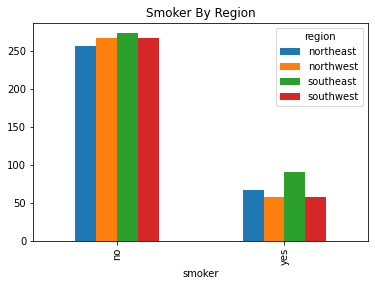

In [60]:
plt.figure(figsize=(18,18))
prd_innings=pd.crosstab(df['smoker'],df['region'] )
print(prd_innings)

ax=prd_innings.plot(kind='bar')

plt.title("Smoker By Region")

**No Smokers:-**
* southeast > northwest=southwest > northeast

**YES Smokers:-**
* southeast > northwest=southwest > northeast

**Conclusion**
* There are maximum number of southeast peoples yes smokers compared to other region.

### Age By Smoker Innings plots

smoker  no  yes
age            
18      57   12
19      50   18
20      20    9
21      26    2
22      22    6
23      21    7
24      22    6
25      23    5
26      25    3
27      19    9
28      25    3
29      21    6
30      18    9
31      22    5
32      21    5
33      20    6
34      21    5
35      20    5
36      19    6
37      16    9
38      23    2
39      19    6
40      22    5
41      25    2
42      19    8
43      15   12
44      21    6
45      24    5
46      24    5
47      19   10
48      24    5
49      24    4
50      25    4
51      23    6
52      23    6
53      23    5
54      23    5
55      24    2
56      22    4
57      22    4
58      24    1
59      21    4
60      18    5
61      17    6
62      19    4
63      18    5
64      15    7


Text(0.5, 1.0, 'Age By Smoker')

<Figure size 1296x1296 with 0 Axes>

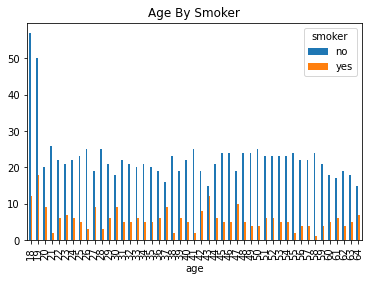

In [61]:
plt.figure(figsize=(18,18))
prd_innings=pd.crosstab(df['age'],df['smoker'] )
print(prd_innings)

ax=prd_innings.plot(kind='bar')

plt.title("Age By Smoker")

**Yes Smokers**
* There are  People of age 18,19,43 and 47  maximum Yes Smokers compared to other of age people.

**No Smokers:-**
* There are not  maximum number of No smokers people compared to Yes smokers people.

**Conclusion:-**
* There are Maximum number of **No Smokers** people compared to **Yes Smokers** people.
* No Smokers > Yes Smokers


### Heat Map

<AxesSubplot:>

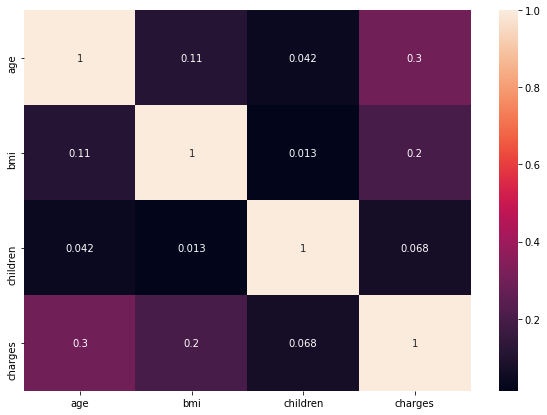

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

### Pairplots of Insurance Data

<Figure size 1152x576 with 0 Axes>

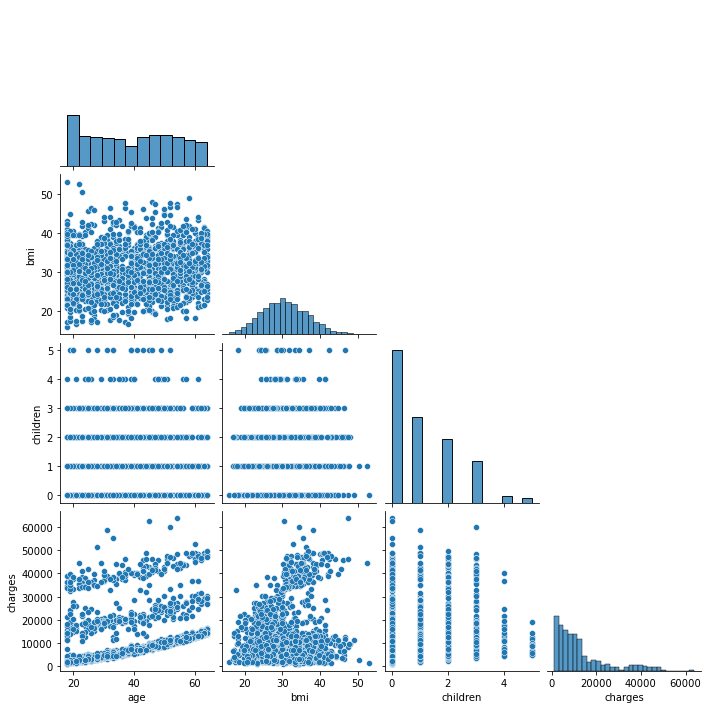

In [63]:
plt.figure(figsize=(16,8))
sns.pairplot(data=df,corner=True)

### Joinplot of Insurance Daata

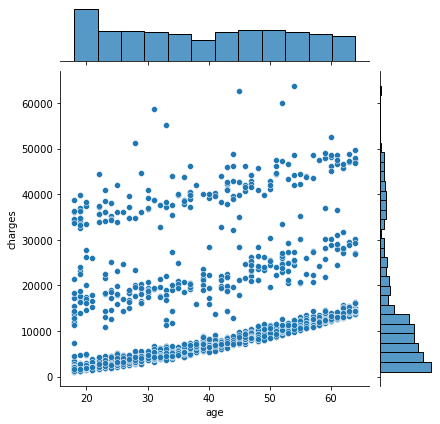

In [38]:
sns.jointplot(x=df['age'],y=df['charges'])

* There are Age goes up Charges for health insurance also trends up.

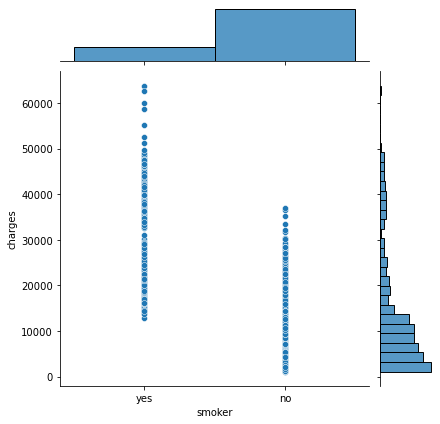

In [39]:
sns.jointplot(x=df['smoker'],y=df['charges'])

* There are charges for Yes Smokers are higher than No Smokers.

### Pointplot of  Smokers Data

[Text(0.5, 1.0, 'Smoker By age and charges ')]

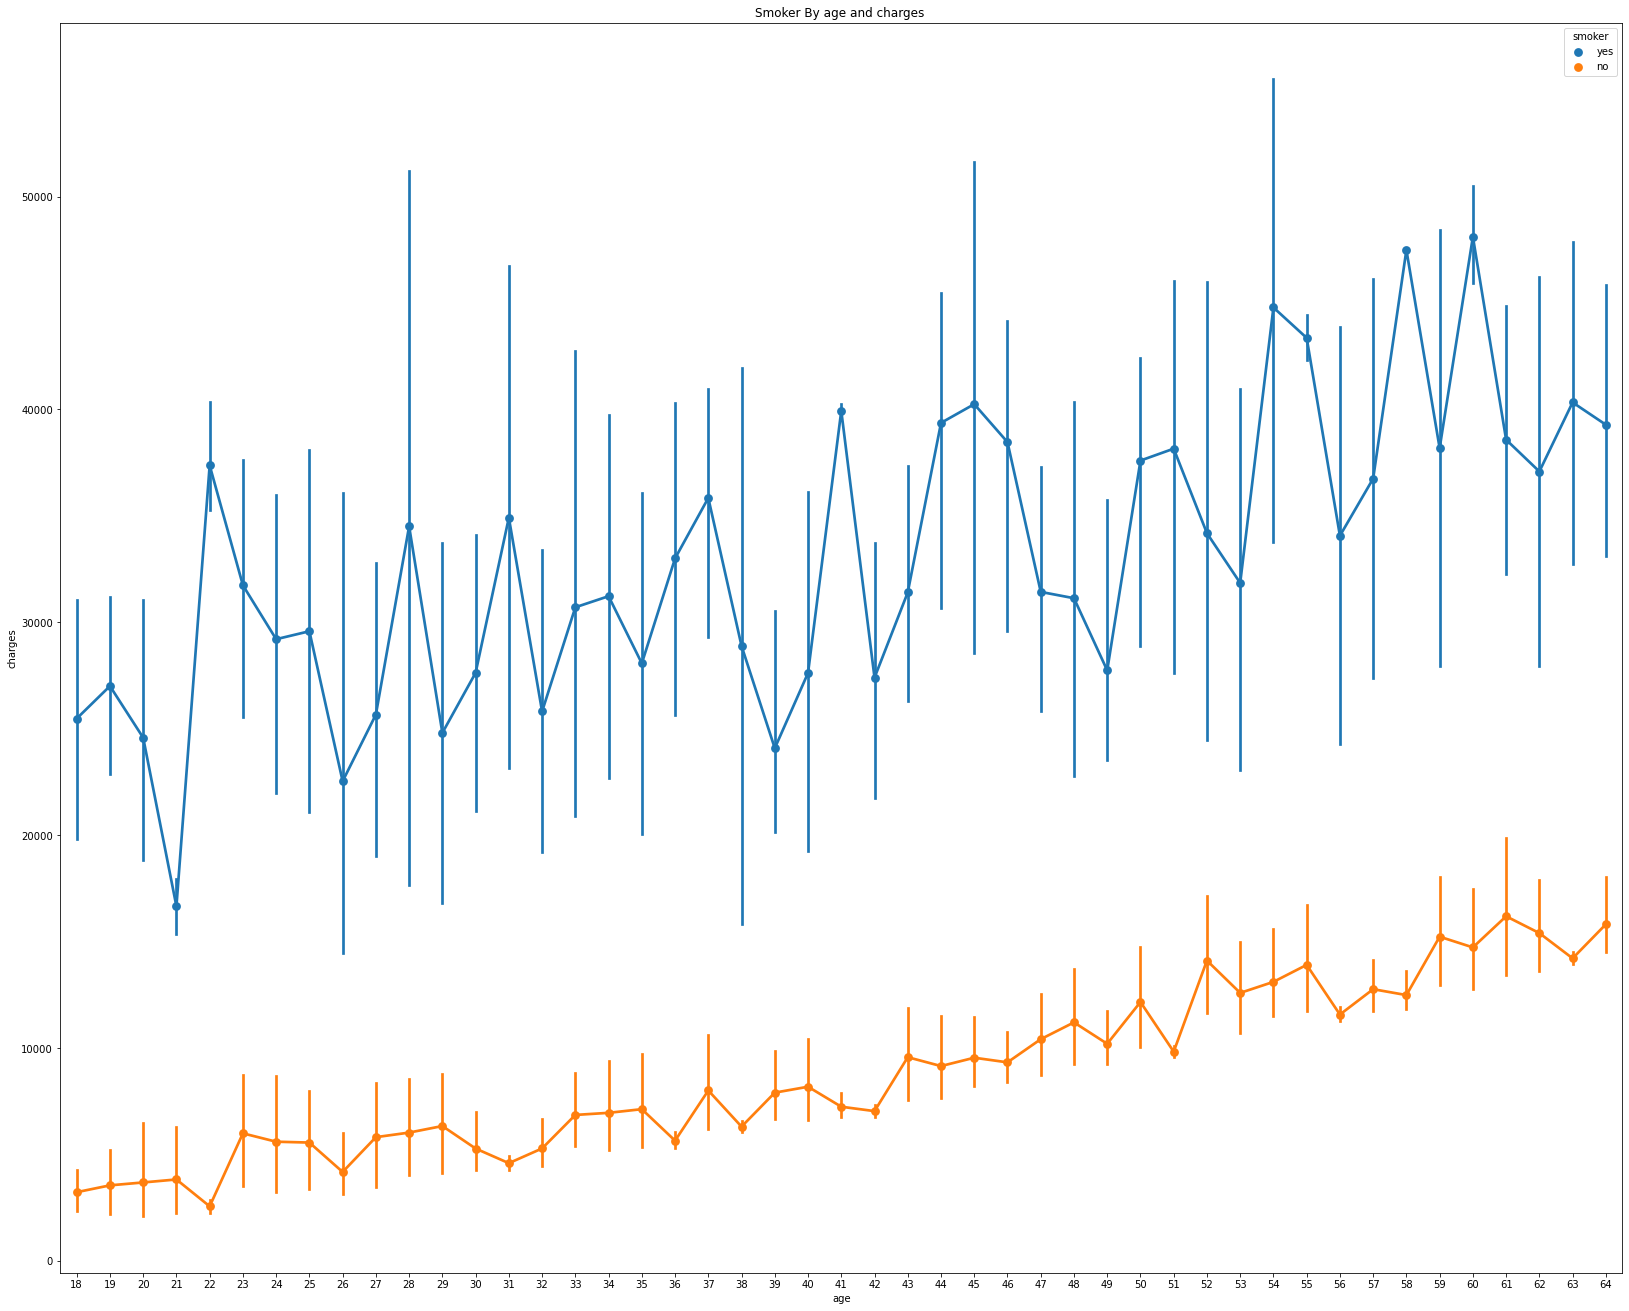

In [40]:
plt.figure(figsize=(28,23))
sns.pointplot(x=df["age"],y=df["charges"],hue=df['smoker']).set(title='Smoker By age and charges ') 

 * There are Age goes up Charges for health insurance also trends up

## Data Prediction Model

In [41]:
df=df[["age","sex","smoker","region","charges"]]
df.dropna(axis=0,inplace=True)

df["sex"].replace(["male","female"],[0,1],inplace=True)
df["region"].replace(["southwest","southeast","northwest","northeast"],[0,1,3,4],inplace=True)
df["smoker"].replace(["yes","no"],[0,1],inplace=True)
df.head()

,age,sex,smoker,region,charges
0,19,1,0,0,16884.92400
1,18,0,1,1,1725.55230
2,28,0,1,1,4449.46200
3,33,0,1,3,21984.47061
4,32,0,1,3,3866.85520


In [42]:
Y=df["smoker"]
X=df.drop("smoker",axis=1)

In [43]:
Y

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [44]:
X

,age,sex,region,charges
0,19,1,0,16884.92400
1,18,0,1,1725.55230
2,28,0,1,4449.46200
3,33,0,3,21984.47061
4,32,0,3,3866.85520
...,...,...,...,...
1333,50,0,3,10600.54830
1334,18,1,4,2205.98080
1335,18,1,1,1629.83350
1336,21,1,0,2007.94500


### Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

### Training the K-NN model on the Training set

In [27]:
from sklearn.neighbors import KNeighborsClassifier


In [28]:
KNN=KNeighborsClassifier(n_neighbors=5,
                        weights="uniform",
                        algorithm="kd_tree",
                        leaf_size=30,
                        p=2,
                        metric="minkowski",
                        n_jobs=-2
                        )

In [29]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-2)

In [30]:
Y_pred=KNN.predict(X_test)

### Apply Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[ 58  13]
 [ 11 253]]


In [38]:
confusion_matrix(Y_test,Y_test)

array([[ 71,   0],
       [  0, 264]], dtype=int64)

In [32]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        71
           1       0.95      0.96      0.95       264

    accuracy                           0.93       335
   macro avg       0.90      0.89      0.89       335
weighted avg       0.93      0.93      0.93       335



### Accuracy Score

In [33]:
Accuracy=accuracy_score(Y_test,Y_pred)

In [34]:
round(Accuracy,2)

0.93

* We got 93% of Accuracy

### Precision Score

In [46]:
from sklearn.metrics import precision_score,recall_score

In [47]:
precision_score=round(precision_score(Y_test,Y_pred),2)

In [48]:
precision_score

0.95

* We got 95% of precision score

### Recall Score

In [54]:
Recall_Score=round(recall_score(Y_test,Y_pred),2)

In [50]:
Recall_Score

0.96

* We got 96% of Recall Score

### F1- Score

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score=round(f1_score(Y_test,Y_pred),2)

In [53]:
f1_score

0.95

* We got 95% of F1-score